In [1]:
import json
import joblib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [3]:
x_train = joblib.load("../artifacts/x_train.pkl")
x_test = joblib.load("../artifacts/x_test.pkl")
y_train = joblib.load("../artifacts/y_train.pkl")
y_test = joblib.load("../artifacts/y_test.pkl")

In [4]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

Find the perfect min samples spit

In [5]:
accuracy_train_list =[]
accuracy_test_list =[]

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42).fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)



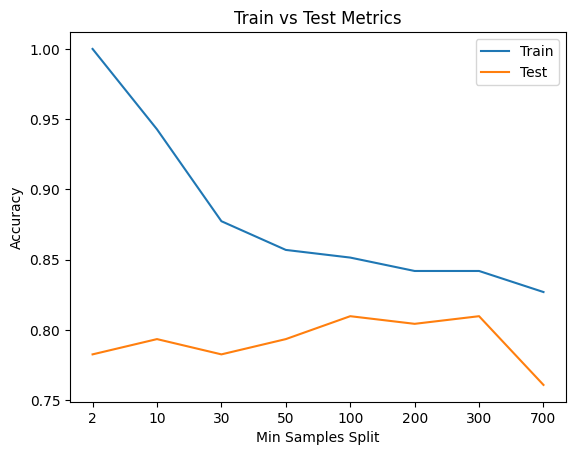

In [7]:
pt.title("Train vs Test Metrics")
pt.xlabel("Min Samples Split")
pt.ylabel("Accuracy")
pt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
pt.plot(accuracy_train_list)
pt.plot(accuracy_test_list)
pt.legend(['Train','Test '])

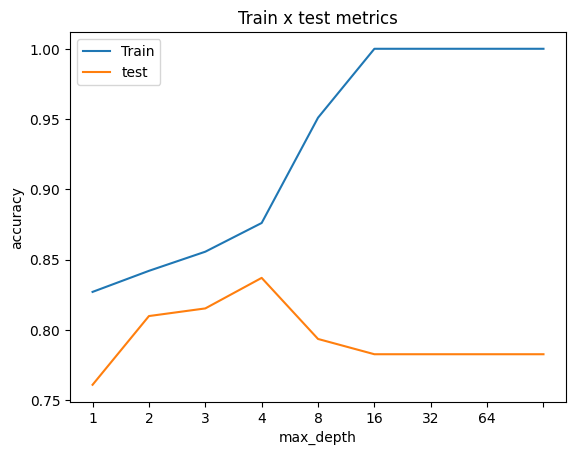

In [8]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 42).fit(x_train,y_train) 
    predictions_train = model.predict(x_train) ## The predicted values for the train dataset
    predictions_val = model.predict(x_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

pt.title('Train x test metrics')
pt.xlabel('max_depth')
pt.ylabel('accuracy')
pt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
pt.plot(accuracy_list_train)
pt.plot(accuracy_list_val)
pt.legend(['Train','test'])

we can choose the best values for these two hyper-parameters for our model to be:

max_depth = 4
min_samples_split = 50

In [12]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=50, random_state=42,max_depth=4).fit(x_train, y_train)
y_test_pred = decision_tree_model.predict(x_test)
y_proba = decision_tree_model.predict_proba(x_test)[:, 1]


In [10]:
from sklearn.metrics import (accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,classification_report)

In [13]:
accuracy  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
roc_auc   = roc_auc_score(y_test, y_proba)

print("Accuracy :", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall   :", round(recall, 3))
print("ROC-AUC  :", round(roc_auc, 3))

Accuracy : 0.815
Precision: 0.827
Recall   : 0.843
ROC-AUC  : 0.877


In [14]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[64, 18],
       [16, 86]])

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        82
           1       0.83      0.84      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.82      0.81       184



In [16]:
import os

os.makedirs("../artifacts", exist_ok=True)

metrics = {
    "model": "Decision Tree",
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "roc_auc": roc_auc
}

with open("../artifacts/metrics_decision_tree.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Decision Tree metrics saved")


Decision Tree metrics saved
